# Classification (1)
Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict


## MNIST database

*Given a certain set of parameters about an image, can we predict the degit inside that image?*

MNIST is a widely used dataset for the hand-written digit classification task. It consists of 70,000 labeled 28x28 pixel grayscale images of hand-written digits. The dataset is split into 60,000 training images and 10,000 test images. There are 10 classes (one for each of the 10 digits). The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images.

In [1]:
import gzip
import pickle
f = gzip.open('mnist.pkl.gz', 'rb')
data = pickle.load(f, encoding='bytes')
f.close()
(X_train, y_train), (X_test, y_test) = data

In [2]:
# Check shape
X_train.shape
#X_train[0]

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0]

5

In [6]:
X_train[0].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
import pandas as pd
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np
np.max(X_train)

255

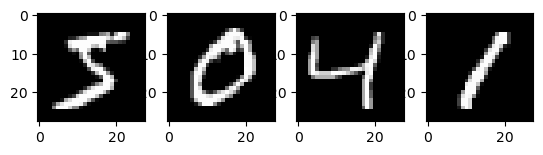

In [9]:
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
np.zeros((4,3)).reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

# reshape the images and convert data type 
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#Check size
print(X_train.shape)

(60000, 784)


In [13]:
X_test.shape

(10000, 784)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Logistic Regression:

1. Paramateric, Supervised learning method
2. Used for _classification. 
3. In general setting used for Binary classification. Can be used for multi class classification

 Data in the form of :    $(X,Y)=(x_{1},x_{2},x_{3},...,x_{k},Y)$ 

Where Input Samples are given in the shape of an array of shape (n_samples, n_features)

And Output values are given as an array of shape (n_samples,)

The goal is to build an Estimator :  $\phi_{L} : X \rightarrow  y$ minimizing :

Err ($\phi_{L}) = E_{X,Y} \{L (Y, \phi_{L}.predict(X))\}$

$P(Y=y|X) = \frac{1}{1+e^{-(\beta_0 + \beta_1x_1)}}$

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter= 500)

In [16]:
y_train.shape

(60000,)

In [17]:
model.fit(X_train, y_train)

C:\courses\Python for data science\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [18]:
model.score(X_train, y_train)

0.9407166666666666

In [19]:
model.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [20]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [21]:
y_test[8]

5

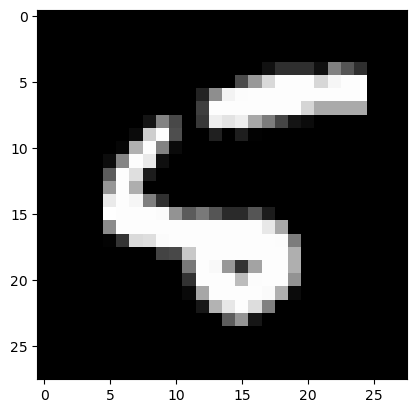

In [22]:
plt.imshow(X_test[8].reshape(28,28), cmap=plt.get_cmap('gray'))

In [23]:
table = pd.DataFrame({'actual':y_test[0:10],
                      'predict':list(model.predict(X_test[0:10]))})
table

,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [24]:
model.predict_proba(X_test[8:9])

array([[6.84860417e-05, 5.11799545e-14, 3.45353752e-08, 7.62228399e-12,
        4.57281778e-05, 2.75980650e-05, 9.99847589e-01, 3.53756656e-15,
        1.05635709e-05, 2.12184345e-10]])

In [25]:
score = model.score(X_test, y_test)
print(score)

0.9218


In [26]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions, labels = range(10))

array([[ 954,    0,    1,    4,    1,    7,    7,    2,    4,    0],
       [   0, 1114,    8,    2,    0,    1,    3,    1,    6,    0],
       [   3,   12,  916,   18,   12,    6,   13,    9,   39,    4],
       [   4,    2,   18,  922,    2,   24,    2,   10,   19,    7],
       [   2,    3,    5,    4,  916,    0,   10,    5,   10,   27],
       [  12,    4,    4,   37,   10,  760,   16,    7,   35,    7],
       [  10,    3,    7,    2,    6,   18,  908,    1,    3,    0],
       [   2,    7,   25,   11,    5,    1,    0,  942,    3,   32],
       [   7,   14,    6,   23,    7,   21,    6,   13,  866,   11],
       [   8,    6,    2,   11,   23,    4,    0,   22,   13,  920]],
      dtype=int64)

In [27]:
pd.DataFrame(confusion_matrix(y_test, predictions, labels = range(10)))

,0,1,2,3,4,5,6,7,8,9
0,954,0,1,4,1,7,7,2,4,0
1,0,1114,8,2,0,1,3,1,6,0
2,3,12,916,18,12,6,13,9,39,4
3,4,2,18,922,2,24,2,10,19,7
4,2,3,5,4,916,0,10,5,10,27
5,12,4,4,37,10,760,16,7,35,7
6,10,3,7,2,6,18,908,1,3,0
7,2,7,25,11,5,1,0,942,3,32
8,7,14,6,23,7,21,6,13,866,11
9,8,6,2,11,23,4,0,22,13,920
